In [1]:
import numpy as np
import torch
from torchvision import transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import h5py
import os
from PIL import Image
import glob
#os.chdir('../../../')

In [2]:
!pwd

/home/batman/Documents/cs282a/proj/test_model


# mag2phase

In [13]:
image_number = 116

torch.Size([256, 256])


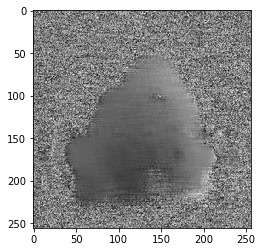

In [14]:
# import ground truth image (PNG))
gt = Image.open('./results/mag2phase_normalize_pix2pix/test_latest/images/'+ str(image_number)+'_real_B.png')
trans1 = transforms.ToTensor()
gt = trans1(gt)[0,:,:]
print(gt.shape)
#torch.equal(gt[2,:,:], gt[1,:,:])
plt.imshow(gt, cmap='gray')

torch.Size([256, 256])


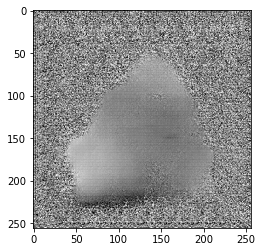

In [10]:
# import generated image
pred = Image.open('./results/mag2phase_normalize_pix2pix/test_latest/images/'+ str(image_number)+'_fake_B.png')
trans1 = transforms.ToTensor()
pred = trans1(pred)[0,:,:]
print(pred.shape)
#torch.equal(pred[0,:,:], pred[2,:,:])
plt.imshow(pred, cmap='gray')

torch.Size([256, 256])
tensor(0.2010)


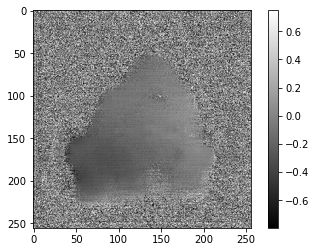

In [11]:
ispace_error = gt - pred
print(ispace_error.shape)
sqerror = torch.pow(ispace_error, 2)
mse = torch.mean(sqerror)
rmse = mse.sqrt()
nrmse = rmse/(pred.max() - pred.min())
print(nrmse)
#plt.imshow(ispace_error, cmap='gray')
plt.imshow(ispace_error, cmap='gray')
plt.colorbar()
plt.show()

### NRMSE calculation over entire test set (mag2phase)

In [13]:
# get nrmse for all images in test set



nrmse_values = []
psnr_values = []

image_directory = '/home/batman/Documents/cs282a/proj/test_model/results/mag2phase_normalize_pix2pix/test_latest/images'

#use glob to make list directory for real and fake B
real_B_list = glob.glob(os.path.join(image_directory, '*_real_B.png'))
fake_B_list = glob.glob(os.path.join(image_directory, '*_fake_B.png'))

for real_B_image, fake_B_image in sorted(zip(real_B_list, fake_B_list)):
   
    gt = Image.open(real_B_image)
    trans1 = transforms.ToTensor()
    gt = trans1(gt)[0,:,:] # single channel; image is same for all 3 channels
    #gt_values = torch.stack(gt_values)


    pred = Image.open(fake_B_image)
    trans1 = transforms.ToTensor()
    pred = trans1(pred)[0:,:,]
    
    # nrmse calculation
    ispace_error = gt - pred
    sqerror = torch.pow(ispace_error, 2)
    mse = torch.mean(sqerror)
    rmse = mse.sqrt()
    nrmse = rmse/(pred.max() - pred.min())
    nrmse_values.append(nrmse)
    
    #psnr calculation
    psnr = 20 * torch.log10(255 / rmse)
    psnr_values.append(psnr)
    
nrmse_values = torch.stack(nrmse_values)
nrmse_values_mean = torch.mean(nrmse_values)

psnr_values = torch.stack(psnr_values)
psnr_values_mean = torch.mean(psnr_values)

print(nrmse_values_mean)
print(psnr_values_mean)

    

tensor(0.2285)
tensor(61.6113)
